In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd
import numpy as np
import glob
from sklearn.linear_model import LinearRegression

# Explore the behaviour of gradient descent

In [3]:
column_names = ["iter", "Vc", "Vso", "Eg", "Ee", "L", "Dx", "lr"]
df_list = []
for i in range(1, 51):
    file_list = glob.glob(f"./exploration csv/{i}l*")
    df_list.append(pd.read_csv(file_list[0], header=None))
    df_list[i - 1].columns = column_names

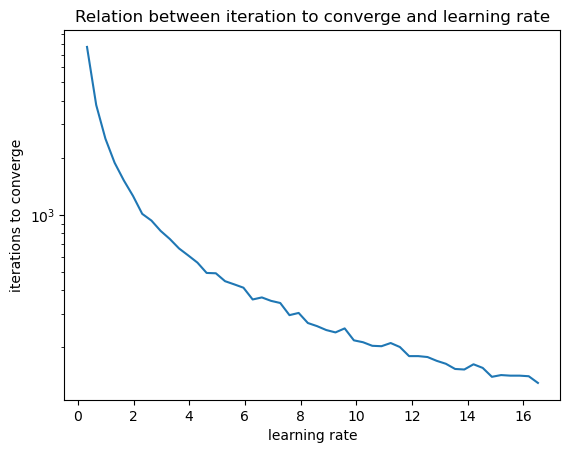

[(0.3303999020324643, 7679), (0.6607998040649286, 3793), (0.9911997060973928, 2521), (1.321599608129857, 1882), (1.6519995101623213, 1519), (1.9823994121947857, 1258), (2.31279931422725, 1012), (2.643199216259714, 933), (2.9735991182921784, 823), (3.3039990203246425, 746), (3.634398922357107, 665), (3.9647988243895713, 611), (4.295198726422036, 560), (4.6255986284545, 494), (4.955998530486964, 492), (5.286398432519428, 447), (5.616798334551892, 430), (5.947198236584357, 413), (6.277598138616821, 358), (6.607998040649285, 367), (6.93839794268175, 352), (7.268797844714214, 343), (7.599197746746678, 296), (7.929597648779143, 304), (8.259997550811606, 269), (8.590397452844071, 259), (8.920797354876536, 247), (9.251197256909, 240), (9.581597158941465, 252), (9.911997060973928, 218), (10.242396963006392, 213), (10.572796865038857, 204), (10.90319676707132, 203), (11.233596669103784, 211), (11.563996571136247, 201), (11.894396473168714, 180), (12.224796375201178, 180), (12.555196277233645, 17

In [4]:
# Iteration in function of learning rate
iter_list = [max(df["iter"]) for df in df_list]
lr_list = [max(df["lr"]) for df in df_list]
plt.plot(lr_list, iter_list)
plt.xlabel("learning rate")
plt.ylabel("iterations to converge")
plt.yscale("log")
plt.title("Relation between iteration to converge and learning rate")
plt.show()
print([ (lr,idx) for lr, idx in zip(lr_list, iter_list)] )

#### The relation is decaying faster than exponential

C:\Users\ekici\AppData\Local\Temp\ipykernel_47820\967210672.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("nipy_spectral")


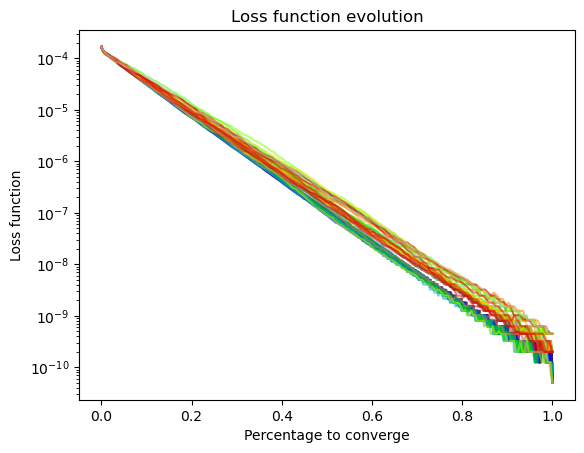

In [6]:
# Loss functions
cmap = cm.get_cmap("nipy_spectral")
norm = Normalize(vmin=0, vmax=50 - 1)

for i in range(50):
    color = cmap(norm(i))
    plt.plot(np.linspace(0, 1, iter_list[i]+1), df_list[i]["L"], color=color, alpha=0.5)
plt.xlabel("Percentage to converge")
plt.ylabel("Loss function")
plt.yscale("log")
plt.title("Loss function evolution")
plt.show()

For Quadratic Loss functions, the Loss decays exponentially

$L(w_k) - L(w^{*}) = \frac{1}{2} e_k^T H e_k$

$e_k = (I-\alpha H)^k e_0$

$\implies L(w_k) - L(w^{*}) \sim C p^k$

$p = max(|1-\alpha\lambda_i|)$

\\

$\tilde{k} = k/N_{final}$ as proportion to convergence

$\implies L_k - L^{*} \sim C(C/\epsilon)^{\tilde{k}}$

which does not depend in learning rate $\alpha$.

That's why $log\ L$ is linear by $\tilde{k}$ and nearly indipendent of learning rate $\alpha$.

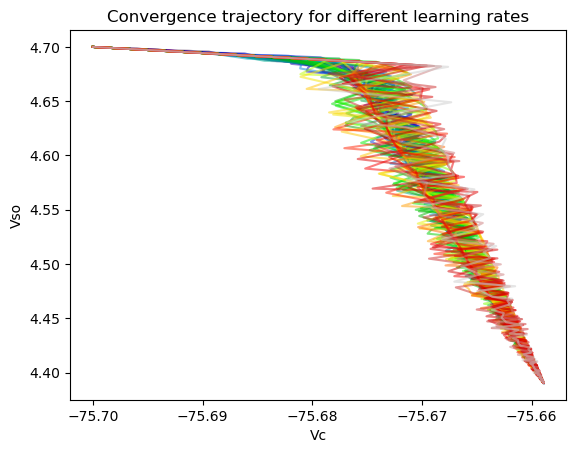

In [8]:
# Convergence trajectory

%matplotlib inline
# %matplotlib qt
for i in range(50):
    color = cmap(norm(i))
    plt.plot(df_list[i]["Vc"], df_list[i]["Vso"], color=color, alpha=0.5)

plt.xlabel("Vc")
plt.ylabel("Vso")
plt.title("Convergence trajectory for different learning rates")
plt.show()

In [9]:
"""
Hessian
eigvals = [0.07855039, 0.00281386]
eigvect = 
    [[ 0.99786511, -0.06530865],
    [ 0.06530865,  0.99786511]]

(-75.65893129217721, 4.3906920017135125)
(-75.67443, 4.6710)
ek = (0.0155, -0.280308)
normalized = array([ 0.05521197, -0.99847466])

Numerically is similar to evap of min evap but the signs don't match.
"""


"\nHessian\neigvals = [0.07855039, 0.00281386]\neigvect = \n    [[ 0.99786511, -0.06530865],\n    [ 0.06530865,  0.99786511]]\n\n(-75.65893129217721, 4.3906920017135125)\n(-75.67443, 4.6710)\nek = (0.0155, -0.280308)\nnormalized = array([ 0.05521197, -0.99847466])\n\nNumerically is similar to evap of min evap but the signs don't match.\n"

#### All follow more or less the same path, in a little oblique direction

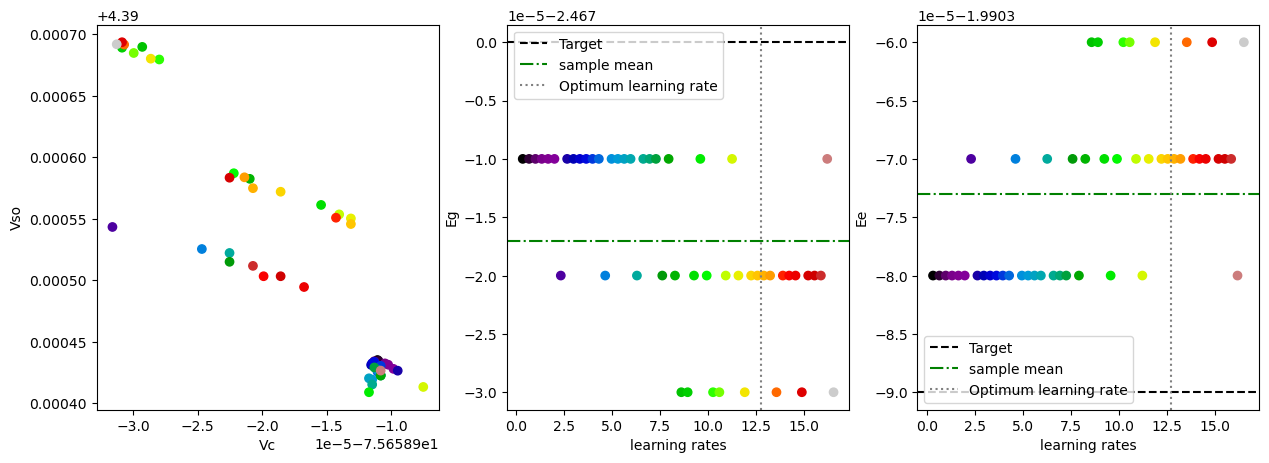

In [11]:
# Final state for different learning rates
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter([df.iloc[-1]["Vc"] for df in df_list], [df.iloc[-1]["Vso"] for df in df_list], c=range(50), cmap="nipy_spectral")
ax1.set_xlabel("Vc")
ax1.set_ylabel("Vso")

ax2.scatter(lr_list, [df.iloc[-1]["Eg"] for df in df_list], c=range(50), cmap="nipy_spectral")
ax2.axhline(y=-2.467000, color='k', linestyle='--', label='Target')
ax2.axhline(y=np.mean([df.iloc[-1]["Eg"] for df in df_list]), color='g', linestyle='-.', label='sample mean')
ax2.axvline(x=12.73086336, color='grey', linestyle=':', label='Optimum learning rate')
ax2.set_xlabel("learning rates")
ax2.set_ylabel("Eg")
ax2.legend(loc='best')

ax3.scatter(lr_list, [df.iloc[-1]["Ee"] for df in df_list], c=range(50), cmap="nipy_spectral")
ax3.axhline(y=-1.990390, color='k', linestyle='--', label='Target')
ax3.axhline(y=np.mean([df.iloc[-1]["Ee"] for df in df_list]), color='g', linestyle='-.', label='sample mean')
ax3.axvline(x=12.73086336, color='grey', linestyle=':', label='Optimum learning rate')
ax3.set_xlabel("learning rates")
ax3.set_ylabel("Ee")
ax3.legend(loc='best')

Text(0.5, 1.0, 'Power of error once converged for different learning rates')

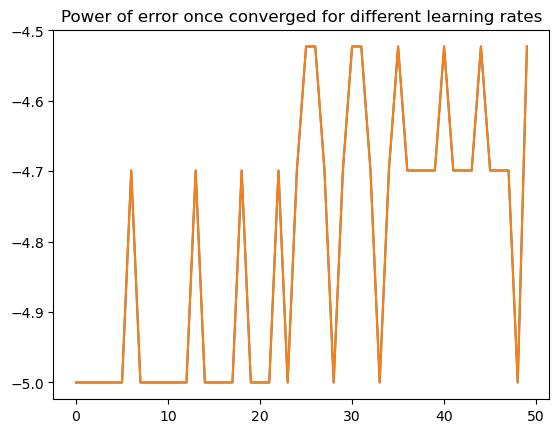

In [12]:
plt.plot(np.log10([abs(df.iloc[-1]["Eg"]+2.467000) for df in df_list]), label='Eg')
plt.plot(np.log10([abs(df.iloc[-1]["Ee"]+1.990390) for df in df_list]), label='Eg')
plt.title("Power of error once converged for different learning rates")

In [13]:
print([df.iloc[-1]["Eg"] for df in df_list])

[-2.46701, -2.46701, -2.46701, -2.46701, -2.46701, -2.46701, -2.46702, -2.46701, -2.46701, -2.46701, -2.46701, -2.46701, -2.46701, -2.46702, -2.46701, -2.46701, -2.46701, -2.46701, -2.46702, -2.46701, -2.46701, -2.46701, -2.46702, -2.46701, -2.46702, -2.46703, -2.46703, -2.46702, -2.46701, -2.46702, -2.46703, -2.46703, -2.46702, -2.46701, -2.46702, -2.46703, -2.46702, -2.46702, -2.46702, -2.46702, -2.46703, -2.46702, -2.46702, -2.46702, -2.46703, -2.46702, -2.46702, -2.46702, -2.46701, -2.46703]


## Conclusions

#### We can see as all samples descent in a similar trayectory, they approach the optimum at the same angle.

In the end, they finish at differents stops near the optimum. 

#### Those with larger learning rate tend to finish before, and thus giving higher error. 

-> It will be interesting to approach the optimum by different angles (with different initial points),
so the distribution of erros doesn't favor one side. 

-> Interesting to have a learning rate smaller than optimal, to trade off a little more iterations (but in the same magnitude) with more precision.

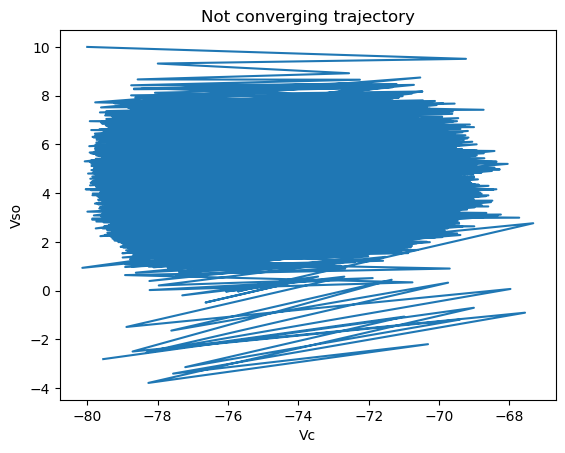

In [15]:
div_df = pd.read_csv(glob.glob(f"./exploration csv/diver*")[0], header=None)
div_df.columns = column_names
div_df

plt.plot(div_df["Vc"], div_df["Vso"], )
plt.xlabel("Vc")
plt.ylabel("Vso")
plt.title("Not converging trajectory")
plt.show()